<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EIP3March2019/blob/master/Phase%202/Assignments/5/EIP3_Phase_2_Praveen_Raghuvanshi_Batch_Thursday_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install image-classifiers package for retrieving pre-trained model of Resnet18 on imagenet
pip install image-classifiers

     |████████████████████████████████| 81kB 27.4MB/s 


In [0]:
# Training parameters and variables
batch_size = 128
epochs = 10
n_classes = 10
pred_images_count = 100

labels = {0: 'plane', 1: 'car', 2:'bird', 3:'cat', 4:'deer', 
         5:'dog', 6:'frog', 7:'horse', 8:'boat', 9: 'truck'}

conv_layer = "stage1_unit1_conv1"
misclassified_img_index = 434

In [0]:
# Plot sample images

import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

def plot_samples(x_train, y_train, rows, cols):
    
    fig = plt.figure(figsize=(12,12))
    g_s = gridspec.GridSpec(rows, cols)
    # g_s.update(left=0.1,right=0.9,wspace=0.05, top=0.9, bottom=0.1)
    ax = {}
    
    for i in range(cols):
        sample_pics = x_train[(y_train == i).reshape(-1)]
        for j in range(rows):
            num_samples = sample_pics.shape[0]
            random_idx = np.random.choice(num_samples, replace=False) 
            sample_pic = x_train[(y_train == i).reshape(-1)][random_idx]

            ax[(i, j)] = fig.add_subplot(g_s[j, i])
            ax[(i, j)].set_xticks([])
            ax[(i, j)].set_yticks([])
            ax[(i, j)].imshow(sample_pic)
        ax[(i, 0)].set_title(labels[i])
    fig.tight_layout()


Using TensorFlow backend.


170500096/170498071 [==============================] - 14s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


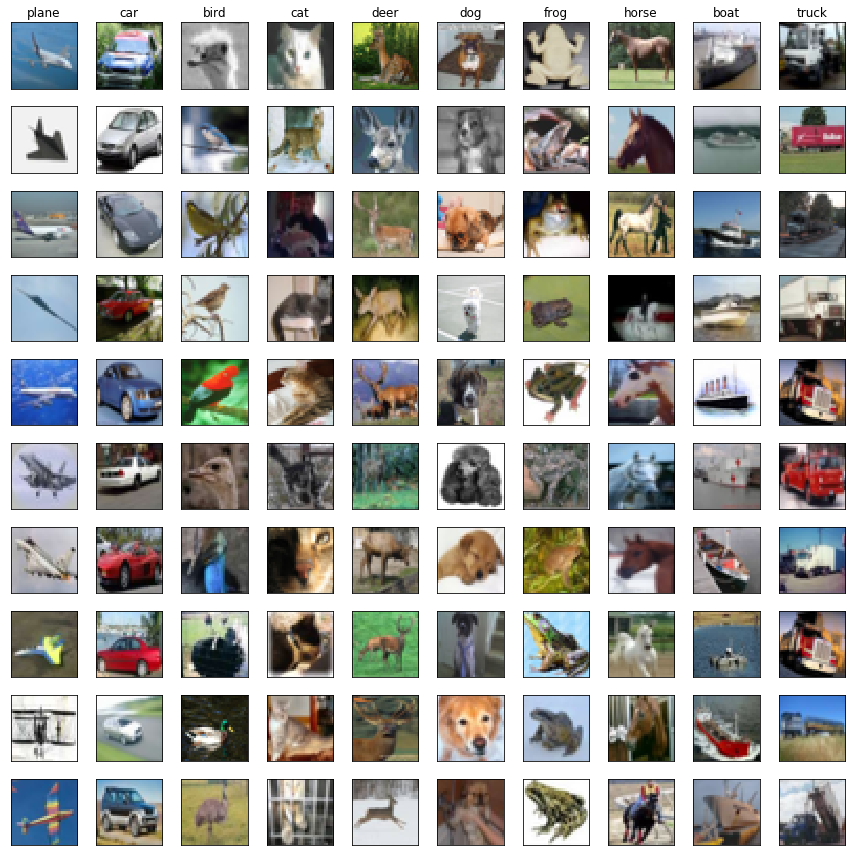

In [4]:
# Load cifar-10 dataset

import keras
from keras.datasets import cifar10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Plot some images
plot_samples(x_train, y_train, 10, 10)


x_predict = x_test[:pred_images_count]
y_predict = y_test[:pred_images_count]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


In [5]:
# Create model

import keras
from classification_models import Classifiers

# Get pre-trained Resnet 18 model
resnet18_classifier, preprocess_input = Classifiers.get('resnet18')
base_model = resnet18_classifier(input_shape=(32,32,3), weights='imagenet', include_top=False)

# Add GAP and dense layer with 10 classes present in CIFAR10 dataset
gap = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation='softmax')(gap)
model = keras.models.Model(inputs=[base_model.input], outputs=[output])

W0710 20:12:00.506689 140487168464768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 20:12:00.567185 140487168464768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 20:12:00.568422 140487168464768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0710 20:12:00.569301 140487168464768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0710 20:12:00.571469 140487

44924928/44920640 [==============================] - 5s 0us/step


In [6]:
# Compile Model

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

# Display layer names
for ilayer, layer in enumerate(model.layers):
    print("{:3.0f} {:10}".format(ilayer, layer.name))

W0710 20:12:12.424150 140487168464768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

In [7]:
# Train model

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

W0710 20:12:12.607831 140487168464768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
50000/50000 [==============================] - 25s 492us/step - loss: 0.8328 - acc: 0.7153
Epoch 2/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.5016 - acc: 0.8274
Epoch 3/10
50000/50000 [==============================] - 17s 342us/step - loss: 0.3729 - acc: 0.8702
Epoch 4/10
50000/50000 [==============================] - 17s 341us/step - loss: 0.2814 - acc: 0.9015
Epoch 5/10
50000/50000 [==============================] - 17s 339us/step - loss: 0.2217 - acc: 0.9232
Epoch 6/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.1720 - acc: 0.9394
Epoch 7/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.1450 - acc: 0.9491
Epoch 8/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.1125 - acc: 0.9610
Epoch 9/10
50000/50000 [==============================] - 17s 338us/step - loss: 0.0999 - acc: 0.9658
Epoch 10/10
50000/50000 [==============================] - 17s 339us/step - loss: 

In [8]:
# Save model and weights
import os

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [9]:
# Score trained model.

scores = model.evaluate(x_test, y_test, verbose=1)
print('\nTest accuracy: %.3f loss: %.3f' % (scores[1] * 100, scores[0]))

10000/10000 [==============================] - 3s 253us/step

Test accuracy: 77.530 loss: 0.992


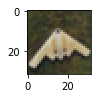

In [10]:
# load single image
from matplotlib import pyplot

# define subplot
pyplot.subplot(331)
# plot raw pixel data
pyplot.imshow(x_test[52], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [0]:
# Image converter 

import numpy as np

def convertCIFAR10Data(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

In [0]:
# Superimpose image and heatmap

import keras.backend as K
import cv2

def getSuperImposeImage(image_index, model, conv_layer):
  # Predict images 

  image = x_test[image_index]
  data = convertCIFAR10Data(image)
  preds = model.predict(data, batch_size=1) 

  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  conv_layer = model.get_layer(conv_layer)

  # Create a heatmap

  grads = K.gradients(class_output, conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([data])
  for i in range(64):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  
  # superimpose image with heatmap

  heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = cv2.addWeighted(image, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)
  
  return superimposed_img

In [0]:
import os

!rm -rf /content/saved_misclassified_Gradcam_images

/content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images


W0710 20:17:59.219573 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:00.451228 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:01.728053 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:03.033454 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:04.536958 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:05.953072 140487168464768 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0710 20:18:07.372119 140487

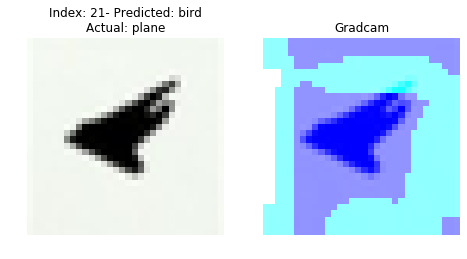

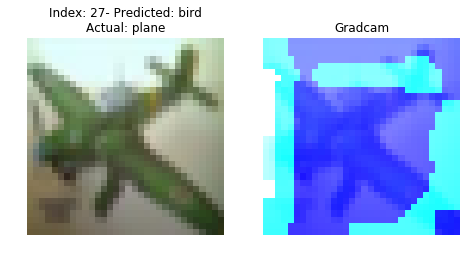

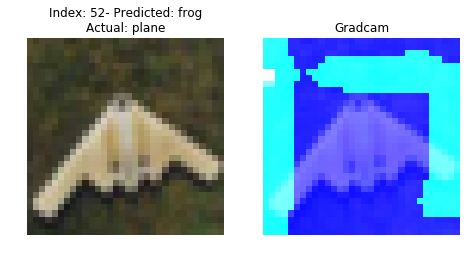

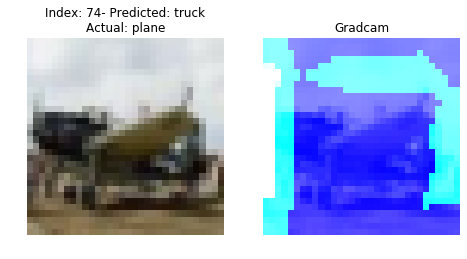

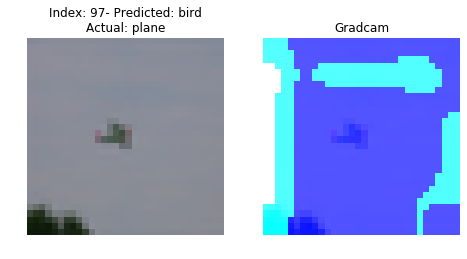

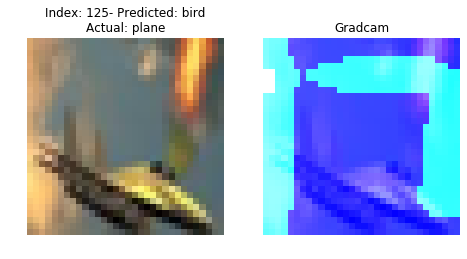

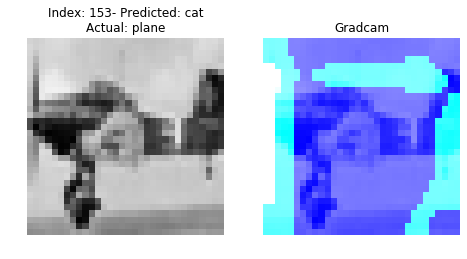

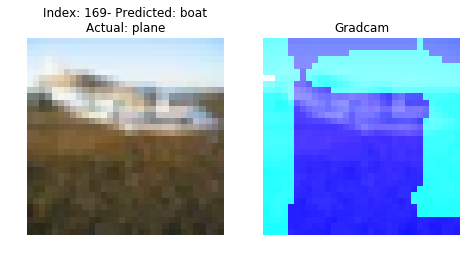

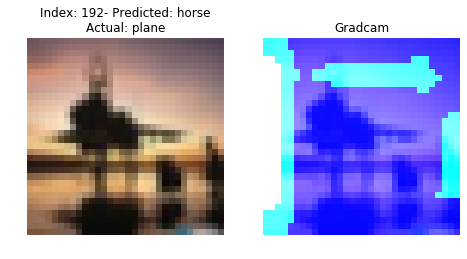

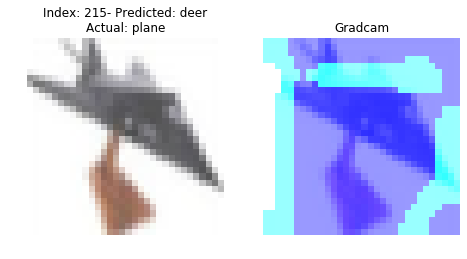

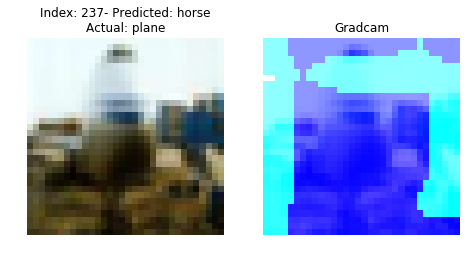

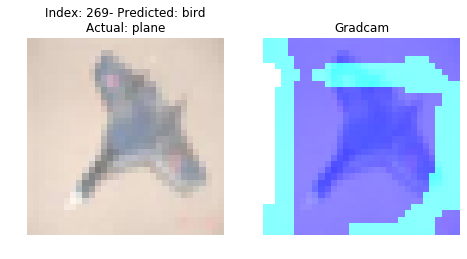

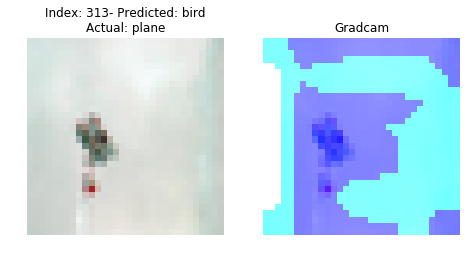

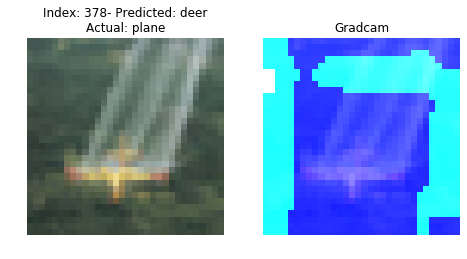

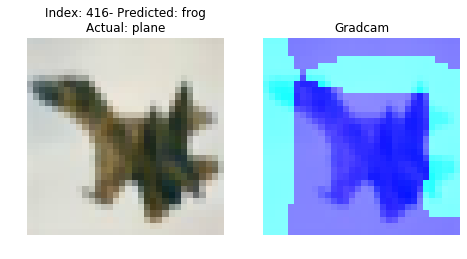

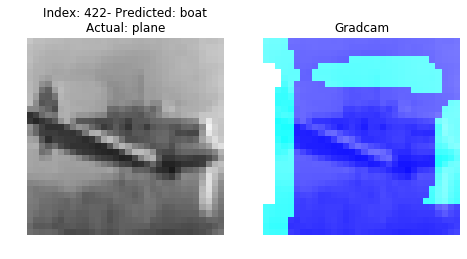

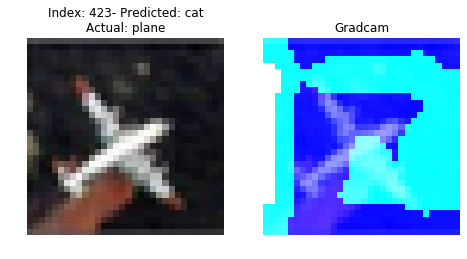

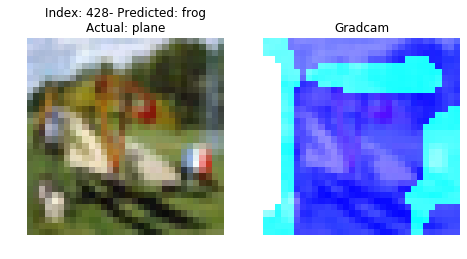

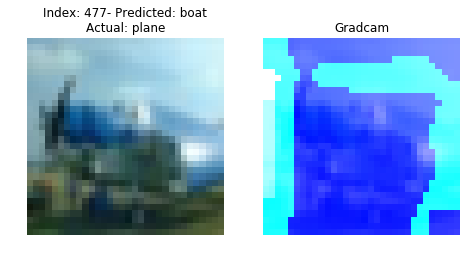

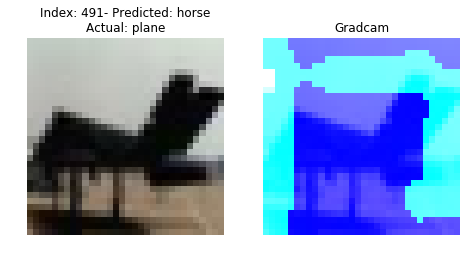

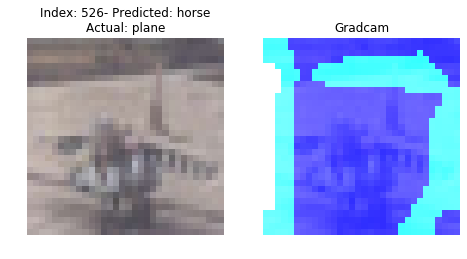

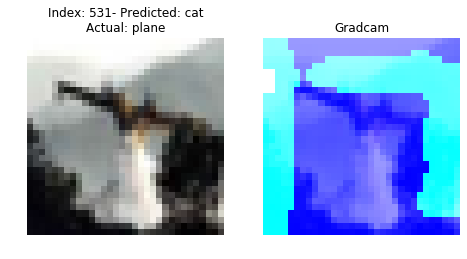

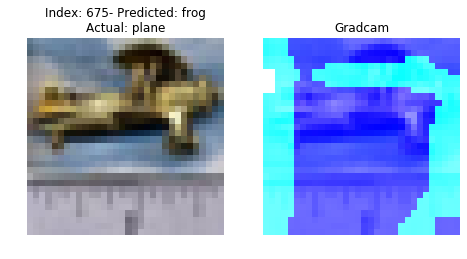

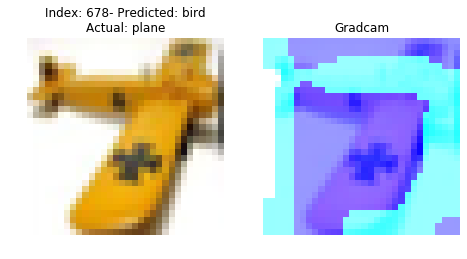

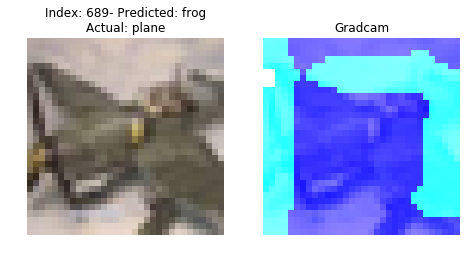

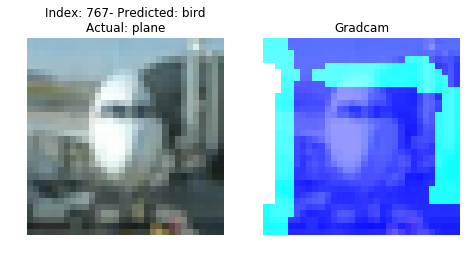

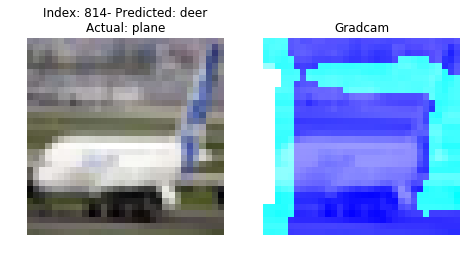

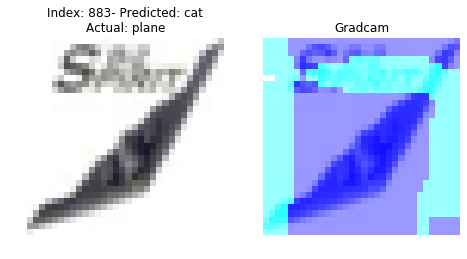

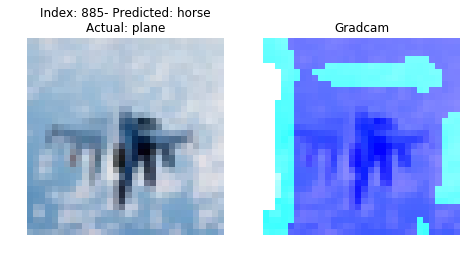

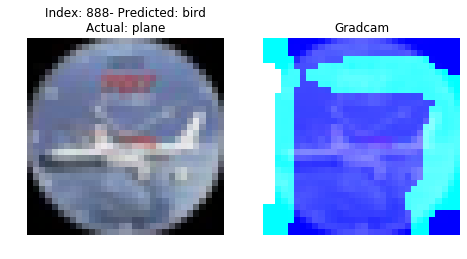

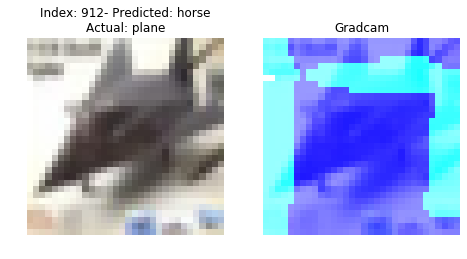

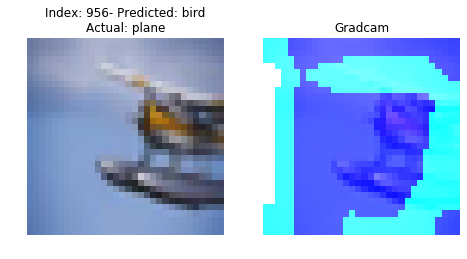

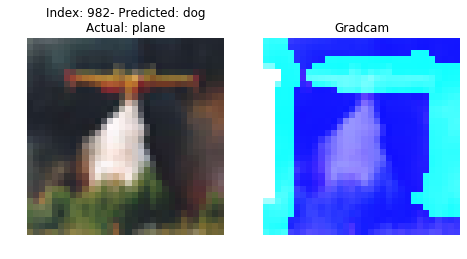

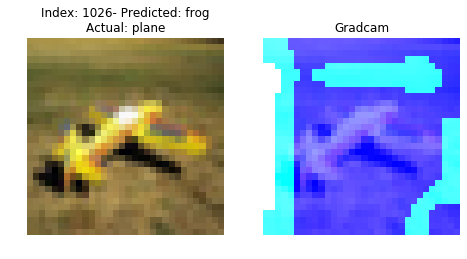

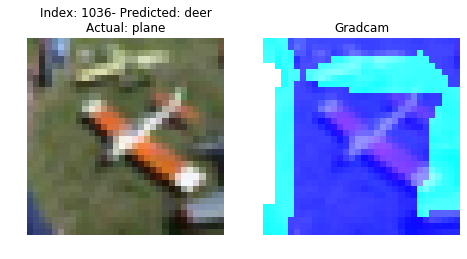

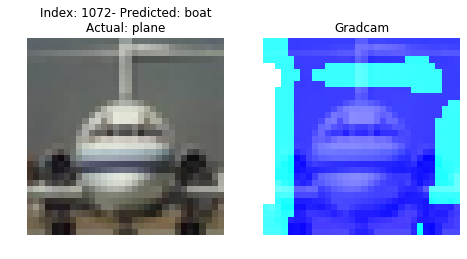

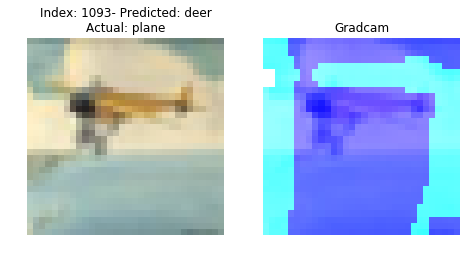

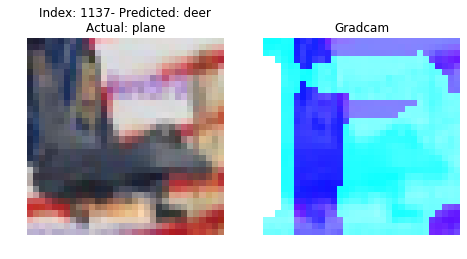

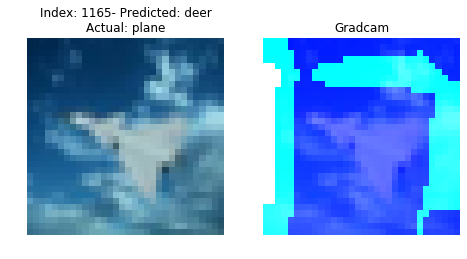

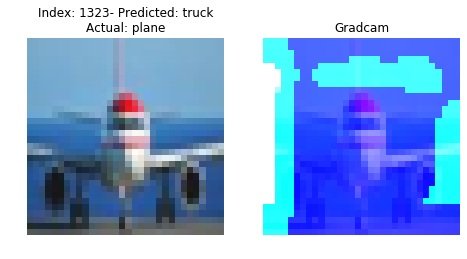

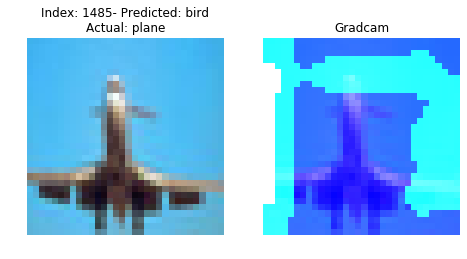

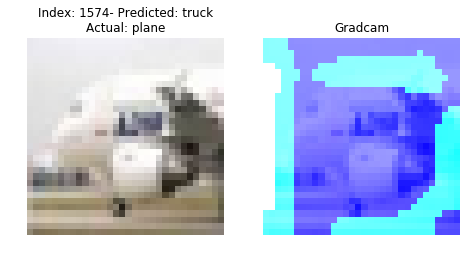

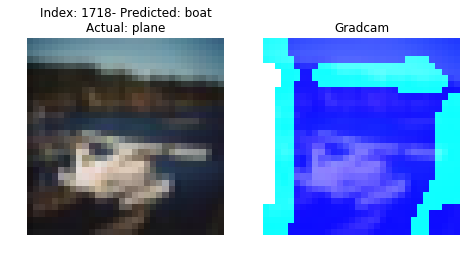

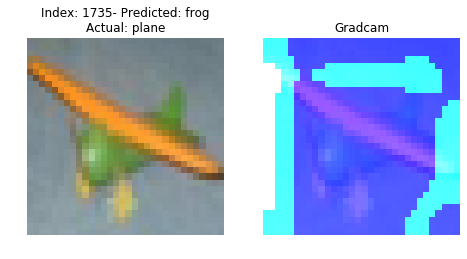

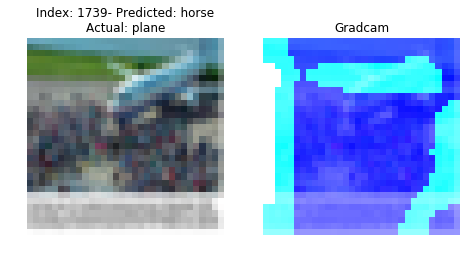

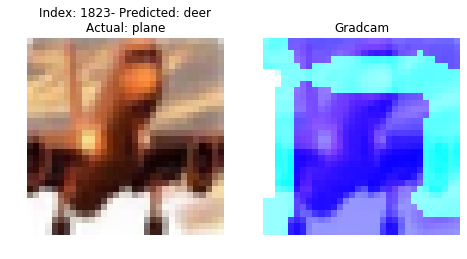

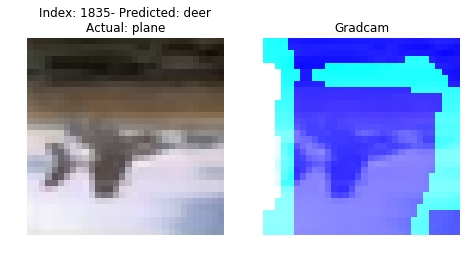

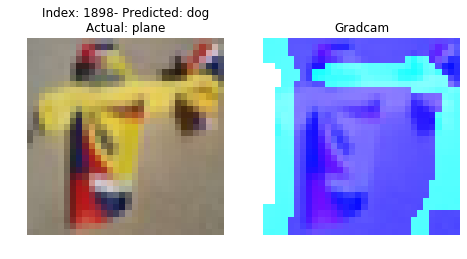

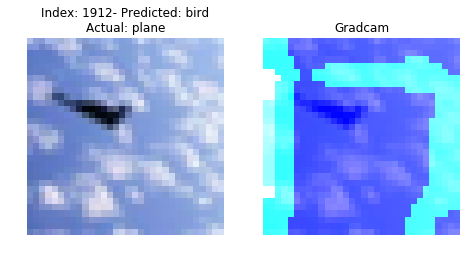

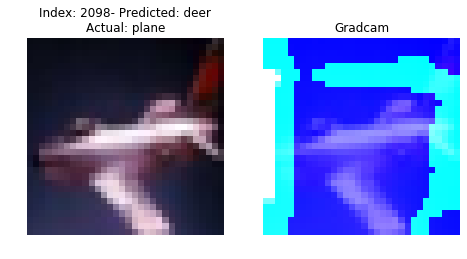

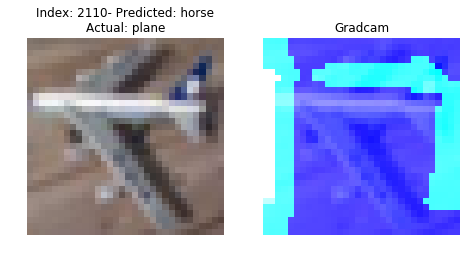

***************************
Misclassified images index : [2, 3, 5, 6, 8, 12, 13, 15, 19, 21, 23, 29, 36, 42, 46, 47, 48, 49, 52, 54, 59, 61, 70, 71, 72, 75, 80, 88, 89, 91, 92, 99, 101, 108, 110, 113, 118, 121, 124, 138, 148, 153, 166, 171, 172, 181, 182, 186, 189, 205, 208]
Misclassified count: 50


In [15]:
# Display and save misclassified and its GradCAM image

import matplotlib.pyplot as plt
import cv2
import os

# Create a directory to save
save_dir = os.path.join(os.getcwd(), 'saved_misclassified_Gradcam_images')
print(save_dir)
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
os.chdir(save_dir)
!ls

    
count = 0
k = 0
l = 0
z = 0

misclassified_indices = []
misclassified_img_counter = 0

while count < 500:
    if z> 9:
        z = 0
        l += 1
    ground_truth = y_test[k].argmax()
    if ground_truth == l:
        prediction = model.predict(x_test[k][np.newaxis,:]).argmax()
        
        # Display misclassified images        
        if labels[prediction] != labels[ground_truth]:
          
          img = x_test[k]
          # Normal Image
          plt.figure(figsize=(12, 12))
          plt.subplot(131)
          plt.title('Index: ' + str(k) + '- Predicted: ' + labels[prediction] + '\n' + "Actual: " + labels[ground_truth])
          plt.axis('off')
          plt.imshow(img)
          normalfilename = str(k) + '_normal.jpg'
          cv2.imwrite(normalfilename, img)

          # Grad-CAM
          superimposed_img = getSuperImposeImage(k, model, conv_layer)
          plt.subplot(132)
          plt.title('Gradcam')
          plt.axis('off')
          plt.imshow(superimposed_img)
          gradcamfilename = str(k) + '_gradcam.jpg'
          cv2.imwrite(gradcamfilename, superimposed_img)
      
          misclassified_indices.append(count)
          if misclassified_img_counter == 50:
            break;
          else:
            misclassified_img_counter += 1            
            
        count += 1
    k += 1

plt.show()

print("***************************")
print("Misclassified images index : " + str(misclassified_indices))
print("Misclassified count: " + str(misclassified_img_counter))


In [16]:
!zip -r /content/file.zip /content/saved_misclassified_Gradcam_images

  adding: content/saved_misclassified_Gradcam_images/ (stored 0%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/ (stored 0%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/1574_gradcam.jpg (deflated 22%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/1735_normal.jpg (deflated 31%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/912_normal.jpg (deflated 32%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/2110_normal.jpg (deflated 31%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/2098_gradcam.jpg (deflated 23%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/153_gradcam.jpg (deflated 22%)
  adding: content/saved_misclassified_Gradcam_images/saved_misclassified_Gradcam_images/982_gradcam.jpg (deflated 22%)